# COGS 108 - Earnings Estimator: Demographic Drivers of US Earnings

# Permissions

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Nessa Pantfoerder
- Lillian Ho
- Chi Cheng
- Romir Kant
- Xiangjun Fu

# Research Question

What are the key demographic factors, such as education level and occupation, that most significantly influence individual earnings in the United States? How can all these characteristics be effectively utilized in predictive models to estimate a person's income in the US?

## Background and Prior Work

Income equality is a critical issue in society, impacting the quality of life and well-being of many individuals. Various factors, such as education level, occupation, gender, and marital status can contribute to these differences in income. For instance, in 2022, individuals with doctoral and professional degrees earned three times more per week than those with less than a high school diploma.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Occupation type also plays a pivotal role, with some roles offering higher salaries than others.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Gender has been shown to play a factor in pay. In 2022, a Pew Research study found that American women were found to earn 82 cents for every dollar earned by American men.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) It is essential to better understand what these factors are to impose policies to counter this inequality. 

Research in this field has explored the relationship between various demographic characteristics and income levels. Christopher Tamborini, Changhwan Kim, and Arthur Sakamoto explored the association between education and income in one of their works, “Education and Lifetime Earnings in the United States”. They used data from the Survey of Income and Program Participation (SIPP) 2004 matched to the Detailed Earnings Record (DER) constructed by the Social Security Administration (SSA) and utilized regression analysis to estimate the net effect of college education on long-term earnings. This revealed a positive correlation between education and lifetime earnings, as well as a gap, implying the differences in earnings based on educational attainment. The results also provided insight into gender differences in lifetime earnings, demonstrating that men consistently earned more than women across all educational levels.<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4) 

Similarly, Esteban Ortiz-Ospina and Max Roser contributed to understanding income, job, and wealth inequality between men and women in “Economic Inequality by Gender”. Through the analysis of data presented by various sources, including the United Nation’s International Labor Organization (ILO), as well as through a review of relevant research on these inequalities, they found that men tend to earn more than women in all regions of the world. Their analysis also revealed the underrepresentation of women in senior positions within firms.<a name="cite_ref-5"></a>[<sup>5</sup>](#cite_note-5)

We hope to build upon this prior work by investigating the impact of demographic factors on an individual’s income. Specifically, we aim to determine what specific factors have the greatest impact one’s likelihood of earning an annual income exceeding $50,000 and use them for income prediction. To accomplish this, we plan on using one of the datasets available on UCI’s Machine Learning Repository and conducting an analysis of these factors and their effects on income. 

1. <a name="cite_note-1"></a> [^](#cite_ref-1) U.S. Bureau of Labor Statistics. (2023, May). Education Pays, 2022. U.S. Bureau of Labor Statistics. https://www.bls.gov/careeroutlook/2023/data-on-display/education-pays.htm 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) U.S. Bureau of Labor Statistics. (2023, April 25). May 2022 OEWS State Occupational Employment and Wage Estimates. U.S. Bureau of Labor Statistics. https://www.bls.gov/oes/current/oes_ca.htm
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Kochhar, R. (2023, March 1). The Enduring Grip of the Gender Pay Gap. Pew Research Center’s Social & Demographic Trends Project. https://www.pewresearch.org/social-trends/2023/03/01/the-enduring-grip-of-the-gender-pay-gap/
4. <a name="cite_note-4"></a> [^](#cite_ref-4) Tamborini, C. R., Kim, C., & Sakamoto, A. (2015). Education and Lifetime Earnings in the United States. Demography, 52(4), 1383–1407. https://doi.org/10.1007/s13524-015-0407-0 
5. <a name="cite_note-5"></a> [^](#cite_ref-5) Ortiz-Ospina, E., & Roser, M. (2019). Economic Inequality by Gender. Retrieved from https://ourworldindata.org/economic-inequality-by-gender




# Hypothesis


The central hypothesis is that in the U.S., age and education level are predominant factors influencing an individual's earnings, particularly in determining the likelihood of earning over $50,000 annually.

This hypothesis is grounded in the premise that with age comes accumulated work experience, often translating into higher earnings, as older workers may possess advanced skills, expertise, and professional networks that younger individuals have not yet developed. 

In terms of education, the hypothesis anticipates a strong positive correlation between educational attainment and income levels. This expectation is based on the notion that higher education often equips individuals with specialized knowledge and skills that are valued in the labor market, thus commanding higher salaries. 

Based on our conclusion for the first question, we believe that these demographic factors, when integrated into predictive models, can effectively estimate a person’s income level (above $50k per year or not) in the United States. #

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Adult
  - Link to the dataset: https://archive.ics.uci.edu/static/public/2/data.csv
  - Number of observations: 48842
  - Number of variables: 15

Our dataset captures demographic information, sourced from the U.S. census, with the primary goal of predicting income levels. Key variables include age (integer), workclass (categorical, representing employment status), fnlweight (integer), education (categorical, denoting education level), marital status (categorical), occupation (categorical, with missing values), relationship (categorical), race (categorical), sex (binary), capital-gain (integer), capital-loss (integer), hours worked per week (integer), native country (categorical, with missing values), and the target variable income (binary).

To prepare our dataset for analysis, we will need to address missing values in "workclass," "occupation," and "native-country" through imputation or removal of affected rows. We can also encode categorical variables, deal with potential outliers, and scale numerical features to further help optimize the dataset for exploring the impacts of demographic characteristics on income and for predicting an individual's likelihood of earning over $50k annually.


## Dataset adult_data.csv 

In [1]:
!pip install xgboost==2.0.2


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# imports 
# Data Manipulation and Numerical Libraries
import pandas as pd
import numpy as np
from numpy import *

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from IPython.core.display import display, HTML

# Machine Learning and Metrics Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Miscellaneous
import warnings
import os

# Configurations
warnings.filterwarnings('ignore')

/tmp/ipykernel_836/2804616680.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
df = pd.read_csv("adult.csv")

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Before Tidying

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [6]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [7]:
df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [8]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [9]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

### Data Cleaning

#### Dropping duplicate rows
Let's see if there are any duplicate rows in our dataset:

In [11]:
print("Initial shape of the dataset : ", df.shape)
df = df.drop_duplicates(keep = 'first')
print ("Shape of the dataset after dropping the duplicate rows : ", df.shape)

Initial shape of the dataset :  (32561, 15)
Shape of the dataset after dropping the duplicate rows :  (32537, 15)


#### Dropping observations 
Notice that a few columns (i.e. occupation) contain missing values, denoted as a '?'. Let's remove any observations that contain missing values in any column: 

In [12]:
df.dropna(axis='rows', inplace=True) # Drop rows that contain an null values

df = df.replace('?', np.nan).dropna(axis='rows', how ='any') # Drop rows containing a '?' value

# df = df[df.occupation != '?']

# df['occupation'].value_counts()

Now, no observations contain missing values: 

In [13]:
df['occupation'].value_counts()

Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
df['workclass'].value_counts()

Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

### Renaming Values
#### Renaming Income Values
Rather than having the values for the income values be <=50K, >50K, we can denote income values greater than 50K as 1, otherwise 0. We rename the column "income" to "income-over-50k" to go with this value update: 

In [15]:
df["income"] = df["income"].replace({"<=50K": 0, ">50K": 1}) # Replace income values with 0 and 1

df.rename(columns={'income': 'income-over-50k'}, inplace=True) # Rename income column so that it is more descriptive

Resulting Data

In [16]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income-over-50k
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


# Results

## Exploratory Data Analysis
##### In this section, we explore the interaction between various demographic factors and how they collectively influence income levels. Specifically, we focus on two key characteristics - education level and age - which are potentially significant determinants of an individual's income in the United States.

Below are some distributions of different features in the dataset:

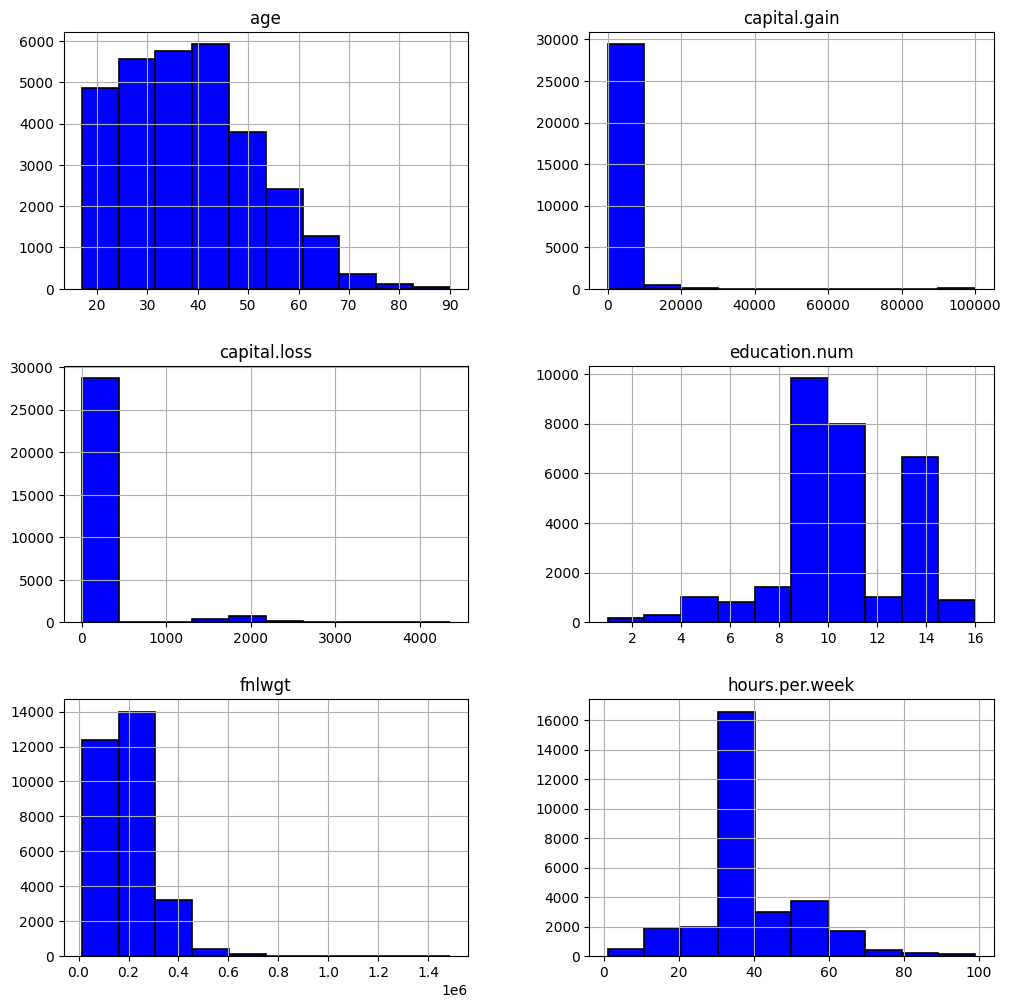

In [17]:
columns_to_plot = ['age', 'capital.gain', 'capital.loss', 'education.num', 'fnlwgt', 'hours.per.week']
distribution = df[columns_to_plot].hist(edgecolor='black', linewidth=1.2, color='b')

fig = plt.gcf()
fig.set_size_inches(12, 12)

# Display the plots
plt.show()


To visualize how each of these factors affect one another, we decided to plot a heatmap.

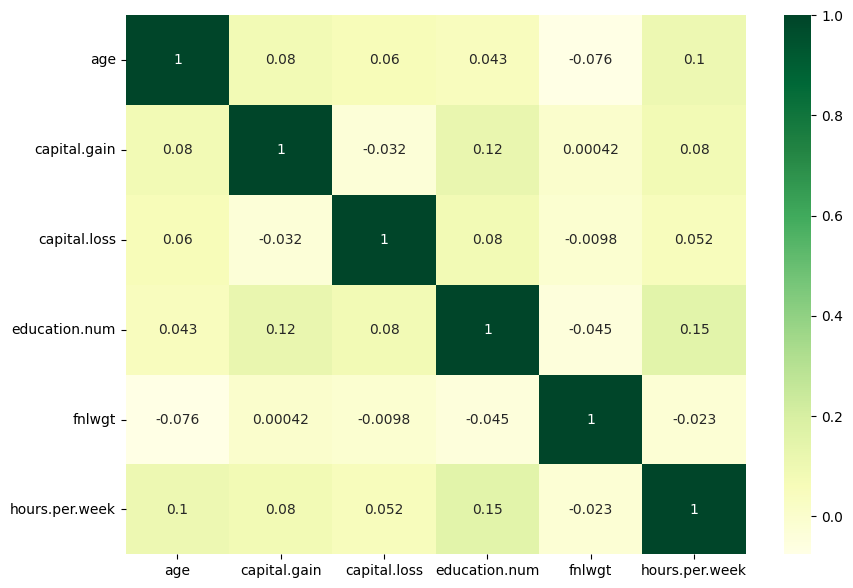

In [18]:

columns_to_plot = ['age', 'capital.gain', 'capital.loss', 'education.num', 'fnlwgt', 'hours.per.week']

corr_matrix = df[columns_to_plot].corr()

plt.rcParams['figure.figsize'] = [10,7]

sns.heatmap(corr_matrix, annot=True, cmap='YlGn')
plt.show()


Here we can observe that these characteristics are not significantly correlated, which underscores the importance of considering all columns in the dataset for subsequent predictive analyses. 

To illustrate this point, examples of education level and working hours are provided below.

#### Education and Hours Per Week

In [19]:
education_hours_df = df.copy()

education_hours_df = education_hours_df.sort_values(by='education.num')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Preschool'),
  Text(1, 0, '1st-4th'),
  Text(2, 0, '5th-6th'),
  Text(3, 0, '7th-8th'),
  Text(4, 0, '9th'),
  Text(5, 0, '10th'),
  Text(6, 0, '11th'),
  Text(7, 0, '12th'),
  Text(8, 0, 'HS-grad'),
  Text(9, 0, 'Some-college'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, 'Assoc-acdm'),
  Text(12, 0, 'Bachelors'),
  Text(13, 0, 'Masters'),
  Text(14, 0, 'Prof-school'),
  Text(15, 0, 'Doctorate')])

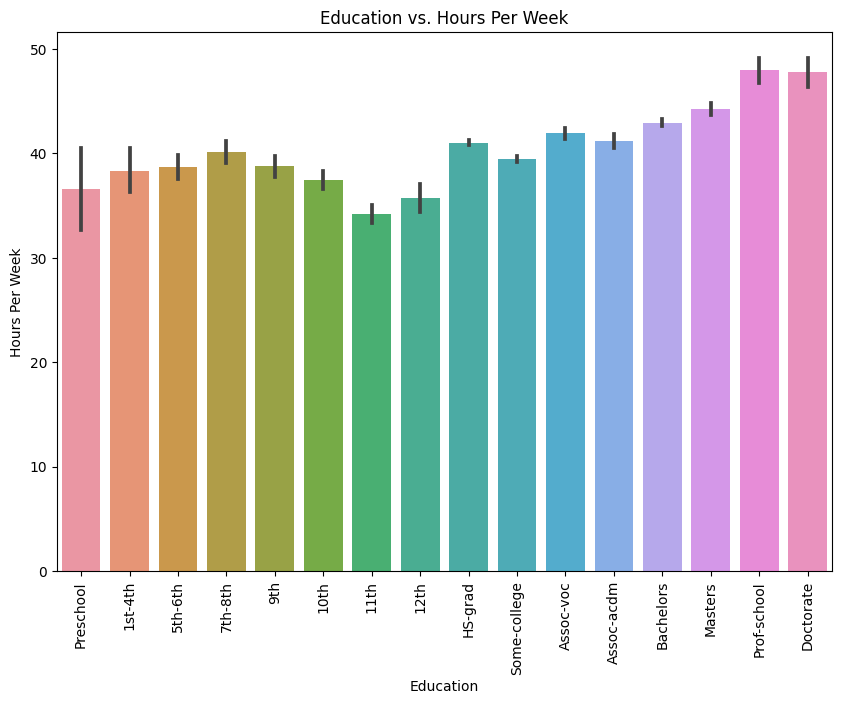

In [20]:
# Plot proportions
ax = sns.barplot(x='education', y='hours.per.week', data=education_hours_df)
ax.set_title('Education vs. Hours Per Week')
ax.set_ylabel('Hours Per Week')
ax.set_xlabel('Education')
plt.xticks(rotation=90)

From the graph, it is evident that there is no strong correlation between a person's education level and their working hours per week. This observation is based on the absence of a consistent upward trend when the education levels are sorted from lowest to highest.

Next, we are specifically exploring what we believe to be two important factors that can affect an individual's income level in the United States: education and age.

### Education vs. Income Level

For starters, we are interested in how education plays a role in influencing one's income level. Here we are plotting some graphs hoping to reveal some relationship between the two variables.
#### Pie chart

In [21]:
# Color palette with 16 unique colors

pie_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#98df8a', '#ff9896', '#c5b0d5', '#c49c94'
]

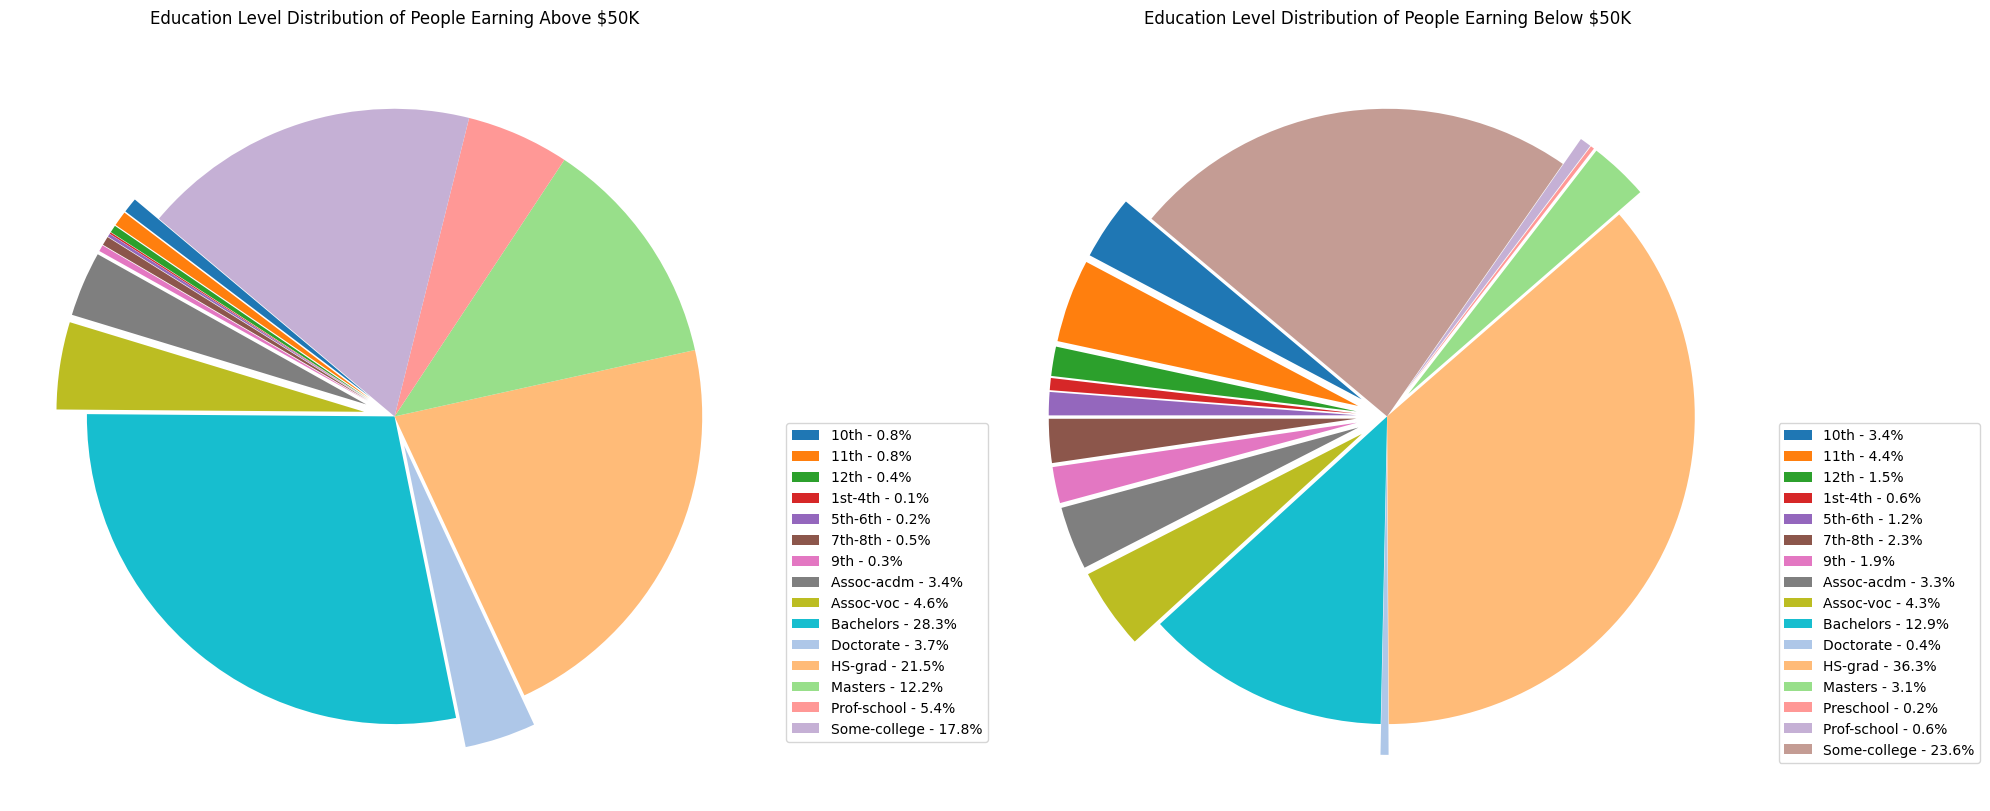

In [22]:
# For this, we need to create two separate dataframes
above_50k = df[df['income-over-50k'] == 1].groupby('education').size()
below_50k = df[df['income-over-50k'] == 0].groupby('education').size()

# Explode the smallest categories by calculating the explode values
explode_above_50k = [0.1 if x < (0.05 * sum(above_50k)) else 0 for x in above_50k]
explode_below_50k = [0.1 if x < (0.05 * sum(below_50k)) else 0 for x in below_50k]

# Creating the pie plots with adjustments
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Adjusted figure size

# Calculating percentages for the legend
percentages_above_50k = [f"{label} - {percentage:.1f}%" for label, percentage in zip(above_50k.index, above_50k.values / sum(above_50k) * 100)]
percentages_below_50k = [f"{label} - {percentage:.1f}%" for label, percentage in zip(below_50k.index, below_50k.values / sum(below_50k) * 100)]

ax[0].pie(above_50k, startangle=140, explode=explode_above_50k, colors=pie_palette)
ax[0].set_title('Education Level Distribution of People Earning Above $50K')
ax[0].legend(loc="best", labels=percentages_above_50k, bbox_to_anchor=(1, 0.5))  # Add a legend

ax[1].pie(below_50k, startangle=140, explode=explode_below_50k, colors=pie_palette)
ax[1].set_title('Education Level Distribution of People Earning Below $50K')
ax[1].legend(loc="best", labels=percentages_below_50k, bbox_to_anchor=(1, 0.5))  # Add a legend

plt.tight_layout()  # Adjust the layout to fit better
plt.show()

The following pie charts illustrate the distribution of education levels among individuals earning both above and below 50,000 dollars. While it is not immediately apparent that a higher educational level guarantees an income above 50K—since major proportions of both income categories include individuals with 'Some-college', 'Bachelors', and 'HS-grad' levels—it is noticeable that individuals with education levels of '12th grade' or lower make up a smaller percentage of the above 50K group compared to the below 50K group. Conversely, those with advanced degrees, such as 'Masters', 'Prof-school', and 'Doctorate', represent a larger share of the above 50K income bracket than the below 50K bracket.

However, these observations should be interpreted with caution. The representation of each education level in the charts is influenced by the overall count of individuals within each category. For instance, the high count of 'HS-grad' individuals contributes significantly to both income groups, which may overshadow the representation of those with 'Masters' or 'Doctorate' degrees. Therefore, while the charts offer some insight into the distribution of income across education levels, they do not provide a definitive correlation between educational attainment and income level. 

#### Line Plot
To provide a clearer understanding of how education affects income, we can undertake a detailed analysis by creating a line plot. This plot would display the percentage of individuals earning within each educational category compared to the total number of people at that educational level.

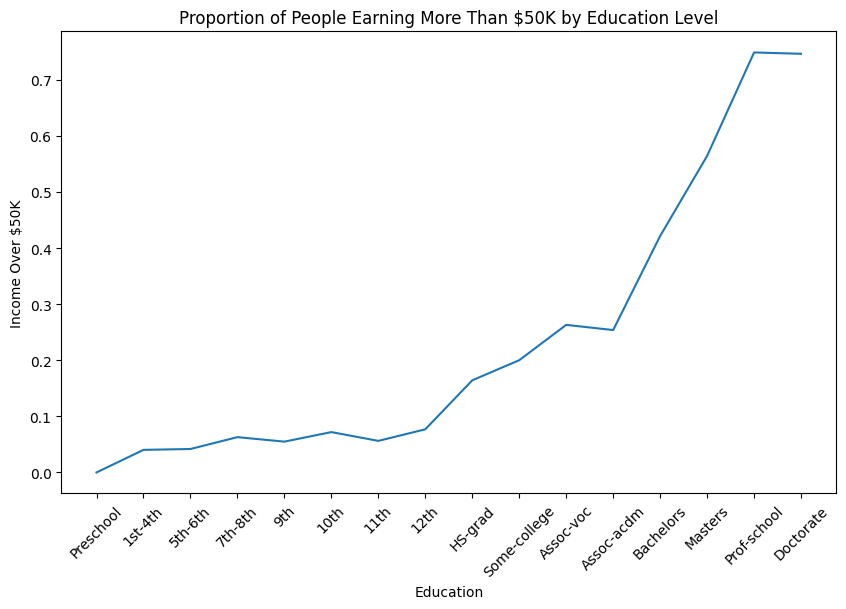

In [23]:
# Grouping by 'education' and 'education-num', then calculating the mean income
education_income_grouped = df.groupby(['education', 'education.num'])['income-over-50k'].mean().reset_index()

# Sorting the DataFrame based on 'education-num'
education_income_grouped = education_income_grouped.sort_values(by='education.num')

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=education_income_grouped, x='education', y='income-over-50k')
plt.title('Proportion of People Earning More Than $50K by Education Level')
plt.xlabel('Education')
plt.ylabel('Income Over $50K')
plt.xticks(rotation=45)
plt.show()

The line plot clearly demonstrates that higher education levels correspond to increased likelihood of earning over 50K, especially from a Bachelor's degree upwards. The trend is stark, with advanced degrees showing a significant rise in the proportion of individuals in the higher income bracket. This reinforces the data from the pie charts, confirming education as a key determinant of earning potential. Individuals with less than a 12th-grade education form a smaller segment of those earning above 50K, while post-secondary and advanced degrees significantly boost income levels, highlighting the value of higher education in enhancing earnings.

#### Grouped Bar Plot
To further our conclusion that education acts as a significant factor that influences one's income, we can generate a grouped bar plot to compare the proportions of people more or less than 50K for each education level. 

Let's generate a separate data frame to calculate the proportion of individuals who have income that exceeds and does not exceed 50K income for each education level:

In [24]:
prop_education_df = (df['income-over-50k'].groupby(by=[df['education'], df['education.num']]).value_counts(normalize=True).rename('proportion').reset_index())

prop_education_df = prop_education_df.sort_values(by='education.num')

prop_education_df

,education,education.num,income-over-50k,proportion
26,Preschool,1,0,1.000000
6,1st-4th,2,0,0.959732
7,1st-4th,2,1,0.040268
8,5th-6th,3,0,0.958188
9,5th-6th,3,1,0.041812
11,7th-8th,4,1,0.062950
10,7th-8th,4,0,0.937050
13,9th,5,1,0.054945
12,9th,5,0,0.945055
0,10th,6,0,0.928049


Using the newly generated data frame, we can create a barplot to see the relation between education levels and income:

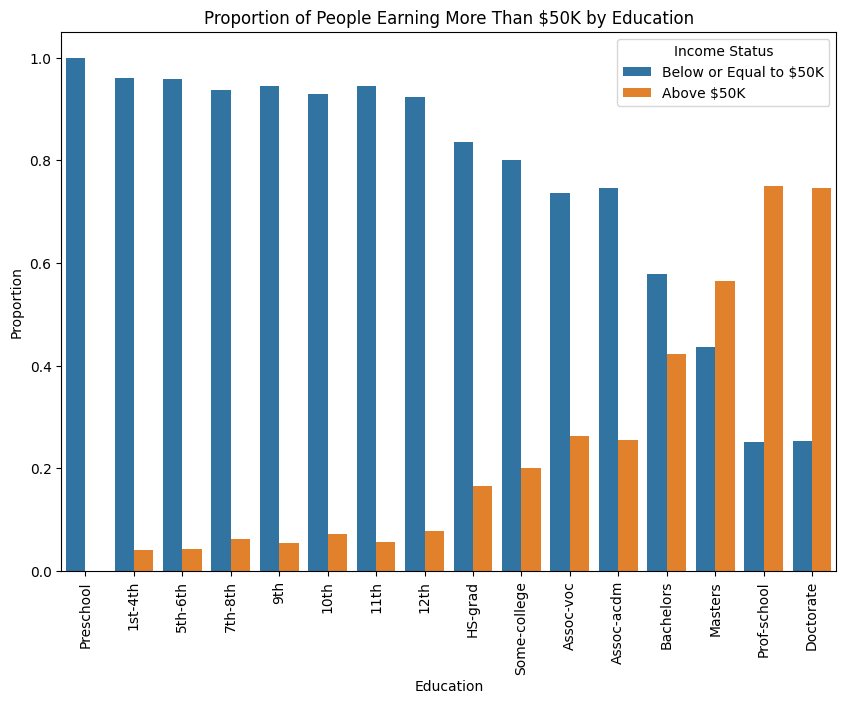

In [25]:
# Plot proportions
ax = sns.barplot(x='education', y='proportion', hue='income-over-50k', data=prop_education_df)
ax.set_title('Proportion of People Earning More Than $50K by Education')
ax.set_ylabel('Proportion')
ax.set_xlabel('Education')
plt.xticks(rotation=90)

# Rename legend
handles, _ = ax.get_legend_handles_labels() # Retrieve handles from generated legend
plt.legend(handles=handles, labels=['Below or Equal to $50K', 'Above $50K'], title='Income Status') # Change labels and title for legend

The grouped bar plot above reinforces the conclusions drawn by the pie chart and line plot generated above. The proportion of individuals with income exceeding 50K appears to grow with the educational level attained.

This relationship is particularly noticeable with education levels greater than or equal to 14, where the proportion of individuals earning more than 50K is greater than those earning less than or equal to 50K. These education levels correlate with a bachelor's degree and upwards. In conjunction with the earlier line plot, this bar plot reinforces the narrative that higher educational achievements are consistently associated with greater earnings by further highlighting how higher education levels correlate with greater earnings by demonstrating how the proportion of individuals earning less than or equal to 50K generally decreases when a higher education level is pursued. 




### Age vs. Income Level

For this section, we are interested in how age influences one's income level. Here are some plots trying to reveal some relationship between the two variables.

#### Histogram of age distribution
First, let's plot a age histogram to see the age distribution from the dataset.

The maximum age is 90
The minimum age is 17


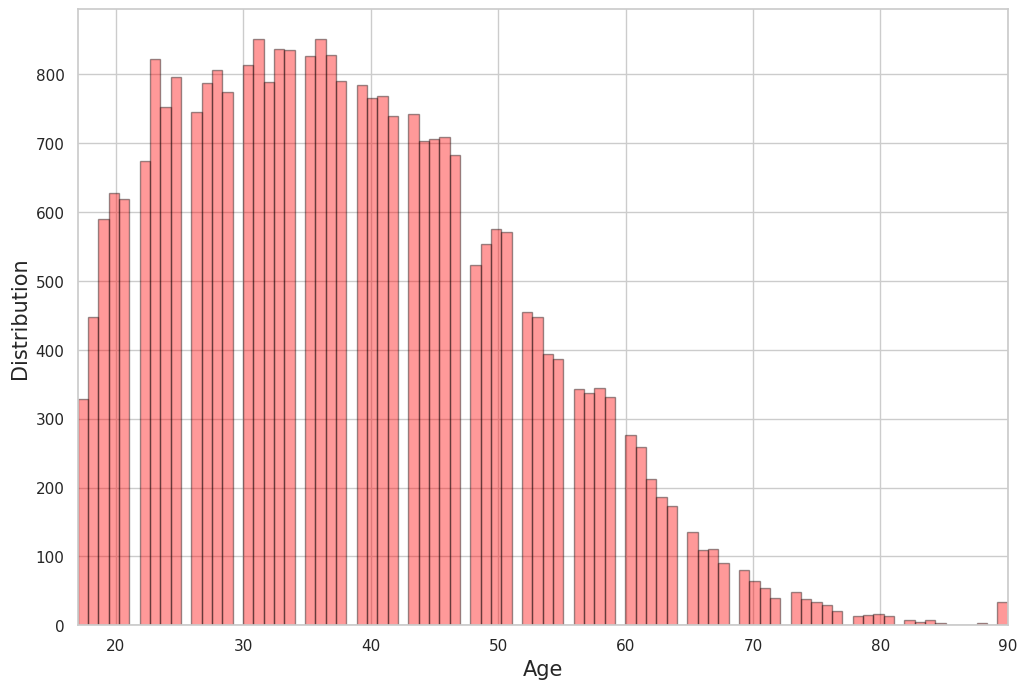

In [26]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, kde=False, color='red', hist_kws={'edgecolor':'black'})
plt.ylabel("Count", fontsize=15)
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

The histogram reveals that the majority of the data collected pertains to individuals within the typical working age range of 21 to 65 years.

#### Line plot

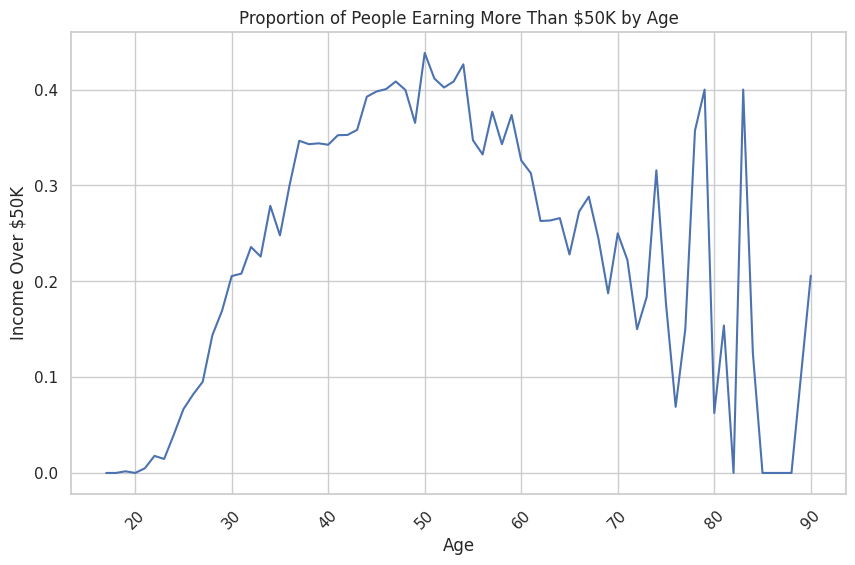

In [27]:
# Grouping by 'age' and then calculating the mean income
age_income_grouped = df.groupby('age')['income-over-50k'].mean().reset_index()

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_income_grouped, x='age', y='income-over-50k')
plt.title('Proportion of People Earning More Than $50K by Age')
plt.xlabel('Age')
plt.ylabel('Income Over $50K')
plt.xticks(rotation=45)
plt.show()

The line plot provided offers insights that align with the hypothesis that age and education level are significant factors in determining an individual's earnings in the U.S., particularly the likelihood of earning over 50,000 annually. 

An initial upward trend supports the notion that accumulated work experience correlates with higher earnings, as it suggests that older workers may benefit from advanced skills and professional networks that younger individuals lack. However, the plot also reveals a peak in earnings, after which the proportion of individuals earning over 50K declines. This could be indicative of retirement or a shift towards lower-paid or part-time roles. The significant fluctuations among the oldest age groups raise questions about data quality and representativeness, suggesting that there might be additional variables at play or potential sampling biases. 

Overall, while the evidence upholds the hypothesis to some extent, particularly the increase in earnings with age, the observed variability for older age groups indicates that a multitude of factors may affect the earning potential over the 50K threshold. This complexity underscores the reuqirement for a robust model to predict income based on these determinants in the U.S.

## Analysis with Prediction Models

### Preprocessing 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30139 non-null  int64 
 1   workclass        30139 non-null  object
 2   fnlwgt           30139 non-null  int64 
 3   education        30139 non-null  object
 4   education.num    30139 non-null  int64 
 5   marital.status   30139 non-null  object
 6   occupation       30139 non-null  object
 7   relationship     30139 non-null  object
 8   race             30139 non-null  object
 9   sex              30139 non-null  object
 10  capital.gain     30139 non-null  int64 
 11  capital.loss     30139 non-null  int64 
 12  hours.per.week   30139 non-null  int64 
 13  native.country   30139 non-null  object
 14  income-over-50k  30139 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.7+ MB


In [29]:
df['income-over-50k'].value_counts() ##

0    22633
1     7506
Name: income-over-50k, dtype: int64

Encode categorical values into numerical values: 

In [30]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_features = {}

for feature in categorical_features:
    label_encoder_features[feature] = LabelEncoder()
    df[feature] = label_encoder_features[feature].fit_transform(df[feature])


In [31]:
df.head() 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income-over-50k
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


Shuffle data:

In [32]:
df = shuffle(df)

Split into test and train sets: 

In [33]:
features = df.drop(columns=['income-over-50k', 'education.num'])

X_train, X_test, y_train, y_test = train_test_split(features, df['income-over-50k'], test_size = 0.2, random_state = 0)

Use XGBClassifier to plot indivdual feature importance. Paramters are added and early stopping is implemented to prevent overfitting of the data.

In [34]:
# Training the model

# Hyperparameters set to prevent overfitting
model = XGBClassifier(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    gamma=1,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.01,
    reg_lambda=1
)

eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model with early stopping
model_importance = model.fit(
    X_train, 
    y_train, 
    early_stopping_rounds=10, 
    eval_metric="logloss", 
    eval_set=eval_set, 
    verbose=False
)


Plot feature importance: 

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

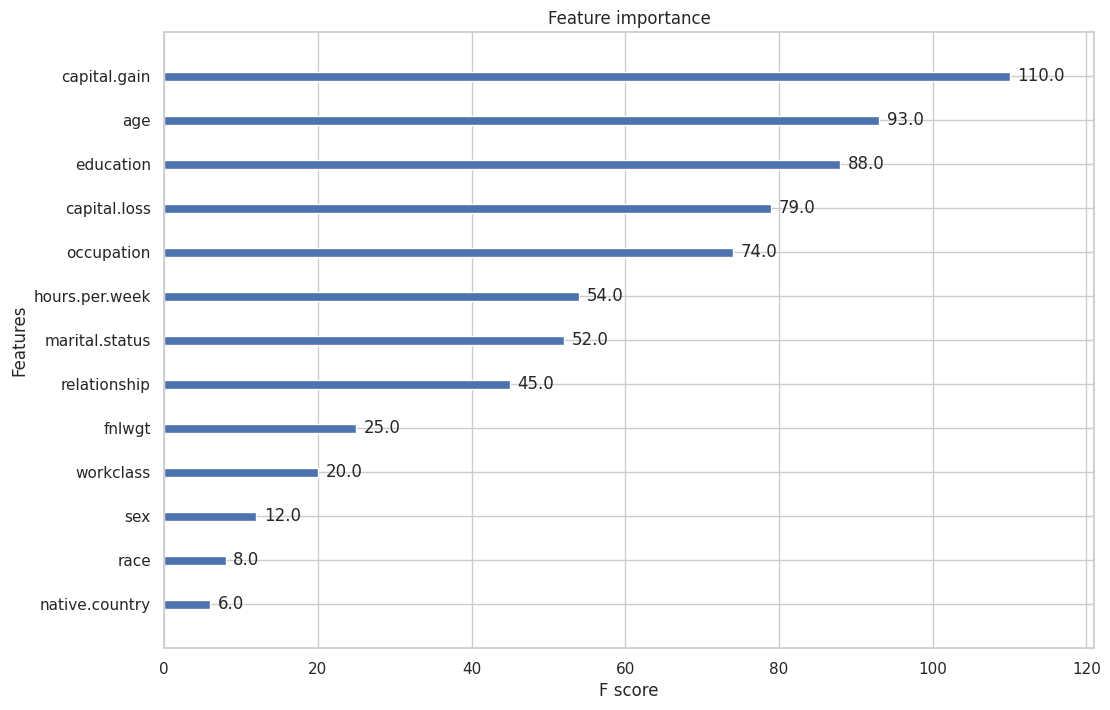

In [35]:
plot_importance(model_importance)


The feature importance plot corroborates the assumption that age and education are influential in determining an individual's income level. In addition to these, 'capital gain' and 'capital loss' emerge as the most significant predictors, which is logical since direct capital transactions can significantly impact an individual's income. High capital gains are typically indicative of additional income, while capital losses might reflect financial setbacks, directly correlating with overall income.

Going beyond the top factors, the 'hours per week' feature also ranks highly, reinforcing the straightforward relationship between the amount of work and income — the more hours one works, typically, the higher their income. 'Occupation' and 'relationship' status also play meaningful roles. Different occupations have varying salary ranges, and a person's relationship status can influence income through combined household earnings and shared responsibilities.

### Model 1: Random Forest

The Random Forest model is favored for our case due to its proficiency in handling the complex and non-linear relationships characteristic of income data. It can also account for the interactions between various socioeconomic factors that collectively influence income. Its ensemble approach, which combines multiple decision trees, helps in preventing overfitting, making it a robust choice. 

In [36]:
# Training the model_2
R_forest = RandomForestClassifier(n_estimators = 200)
model_1 = R_forest.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)

print ("The accuracy of RF model: ",accuracy_score(y_test, pred_1))
print ("The f1 score of RF model : ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of RF model:  0.851692103516921
The f1 score of RF model :  0.6786484543493889


### Model 2: Boosted Gradient Descent

##### Why BGD is picked to use here

In [37]:
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 500)
model_2 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of BGD model: ",accuracy_score(y_test, pred_2))
print ("The f1 score of BGD model: ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of BGD model:  0.8666224286662243
The f1 score of BGD model:  0.7144886363636362


### Model 3: Logistic Regression

##### Why LR is picked to use here

In [38]:
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_3 = logistic.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)

print ("The accuracy of LR model: ",accuracy_score(y_test, pred_3))
print ("The f1 score of LR model: ", f1_score(y_test, pred_3, average = 'binary'))

The accuracy of LR model:  0.7820172528201725
The f1 score of LR model:  0.4070397111913358


### Analysis of the model performance

First, we evaluate our model's performance using the classification_report function.

In [39]:
print ("Classification Report of Random Forest Classifier")
print (classification_report(y_test, pred_1, target_names = ["<=50K", ">50K"]))

Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4524
        >50K       0.74      0.63      0.68      1504

    accuracy                           0.85      6028
   macro avg       0.81      0.78      0.79      6028
weighted avg       0.85      0.85      0.85      6028



The model's performance report suggests it effectively identifies individuals earning "<=50K," as evidenced by its strong precision and recall in this income category, indicating reliable accuracy for lower-income predictions.

Conversely, the model's predictions for individuals earning ">50K" are less precise and show a notably reduced recall, indicating that the model tends to miss a fair number of higher-income earners. Despite this, the model maintains a relatively high overall accuracy. 

In [40]:
print ("Classification Report of Boosted Gradient Descent")
print (classification_report(y_test, pred_2, target_names = ["<=50K", ">50K"]))

Classification Report of Boosted Gradient Descent
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4524
        >50K       0.77      0.67      0.71      1504

    accuracy                           0.87      6028
   macro avg       0.83      0.80      0.81      6028
weighted avg       0.86      0.87      0.86      6028



In [41]:
print ("Classification Report of Logistic Regression")
print (classification_report(y_test, pred_3, target_names = ["<=50K", ">50K"]))

Classification Report of Logistic Regression
              precision    recall  f1-score   support

       <=50K       0.80      0.94      0.87      4524
        >50K       0.63      0.30      0.41      1504

    accuracy                           0.78      6028
   macro avg       0.72      0.62      0.64      6028
weighted avg       0.76      0.78      0.75      6028



Then, we examine the results presented in the form of a confusion matrix.

In [42]:
print ("The Confusion Matrix of : Random Forest Classifier")
print(pd.DataFrame(confusion_matrix(y_test, pred_1)))

The Confusion Matrix of : Random Forest Classifier
      0    1
0  4190  334
1   560  944


The confusion matrix indicates that the model proficiently identifies individuals earning 50K or less, as reflected by a substantial number of true negatives. It also correctly identifies a moderate number of individuals earning more than 50K, but there is a noteworthy number of false negatives, highlighting a potential issue with the model's recall for the higher income bracket, which suggests that it often misclassifies individuals who earn more than 50K as earning less.


In [43]:
print ("The Confusion Matrix of : Boosted Gradient Descent")
print(pd.DataFrame(confusion_matrix(y_test, pred_2)))

The Confusion Matrix of : Boosted Gradient Descent
      0     1
0  4218   306
1   498  1006


In [44]:
print ("The Confusion Matrix of : Logistic Regression")
print(pd.DataFrame(confusion_matrix(y_test, pred_3)))

The Confusion Matrix of : Logistic Regression
      0    1
0  4263  261
1  1053  451


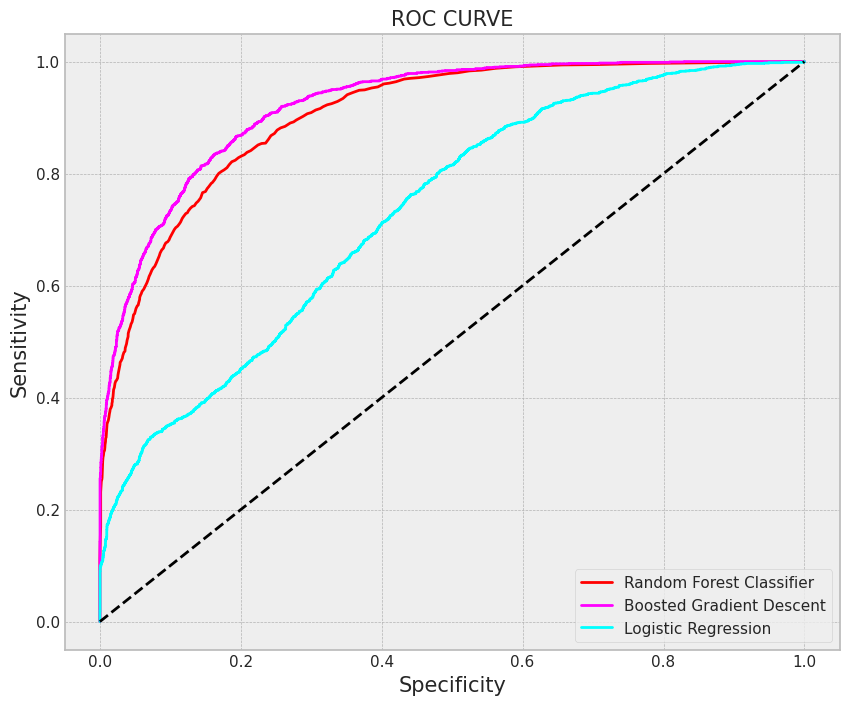

In [45]:
# ROC Curve for the classification models
model_names = ["Random Forest Classifier", "Boosted Gradient Descent", "Logistic Regression"]
models = [model_1, model_2, model_3]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()

# Ethics & Privacy

Ensuring ethical and privacy considerations are central to our project, given that it handles sensitive demographic data. Privacy concerns would be addressed by ensuring that the dataset is anonymized. 

Additionally, participants would have their identities protected from those handling the data. Working with this data we need to adhere to ethical guidelines and ensure to obtain any necessary permissions to use the data. 

We acknowledge the potential for biases in the dataset, which could arise from factors such as data collection methods and sources (especially given the size of our dataset in proportion to all workers in the US). 

Further, our analysis will be conducted with sensitivity to potential biases and inequalities especially in income, race, and gender. We remain vigilant to additional ethical concerns, committed to equitable impact, and ready to implement corrective measures as needed to uphold the highest standards of ethics and privacy. 

Moreover, we acknowledge that there are possible unintended consequences of our study such as reinforcement of stereotypes. Our findings could unintentionally reinforce some stereotypes if they are interpreted without the context. To mitigate this, we aim to provide comprehensive analysis and nuanced reporting that emphasize the complex interplay of socioeconomic factors.

# Discusison and Conclusion
Our research questions have been addressed by investigating all factors that influence income level, with a particular focus on education and age. Our hypothesis that there is a positive correlation between education level and income, and that older workers tend to earn more than their younger counterparts, is confirmed. These two factors have also been identified as significant contributors to income level by our XGBoost classifier model, as evidenced by the feature importance F scores.

Furthermore, we employed a Random Forest model to predict whether individuals earn more than 50K per year. When applied to the entire dataset, both the classification report and the confusion matrix indicate that the model's overall accuracy is relatively high (approximately 87%). However, the model could be refined to improve its predictions for the ">50K" category, as it currently has a significantly lower recall compared to the "<=50K" group, suggesting that it fails to identify a number of high-income earners.

# Team Contributers
Xiangjun Fu -- Research Question, Hypothesis, EDA, Predictive Analysis

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86d5cae1-27c5-4f08-9f01-be22ef0e8ded' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>